In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)
print("MNIST Training Data shape: {}".format(train.shape))
print("MNIST Test Data shape: {}".format(test.shape))

MNIST Training Data shape: (60000, 785)
MNIST Test Data shape: (10000, 785)


In [3]:
trainData, trainTargets = train[:3000, 1:], train[:3000, 0]
testData, testTargets = test[:1000, 1:], test[:1000, 0]
orig_dimensions = trainData.shape[1]

In [4]:
print("MNIST USING KNN WITHOUT PCA")
print('-'*30)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainTargets)
score = model.score(testData, testTargets)
print("Accuracy: {}".format(score*100))

MNIST USING KNN WITHOUT PCA
------------------------------
Accuracy: 89.0


In [5]:
print("MNIST USING KNN WITH PCA")
print('-'*30)
pcaobj = PCA(n_components = 100)
pcaTrainData = pcaobj.fit_transform(trainData)
pcaTestData = pcaobj.fit_transform(testData)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(pcaTrainData, trainTargets)
print("Components:")
print(pcaobj.components_)
print('-'*30)
print("Variances:")
print(pcaobj.explained_variance_ratio_)
print('-'*30)
score = model.score(pcaTestData, testTargets)
print("Accuracy: {}".format(score*100))

MNIST USING KNN WITH PCA
------------------------------
Components:
[[-4.70455320e-19 -2.90458000e-18 -1.94827353e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 7.38953255e-19  7.95324554e-18  6.76486744e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 2.87064954e-18 -2.91193654e-17 -1.87125830e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 7.10663463e-18 -3.03724131e-17  2.38934751e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.60411619e-17  3.40942560e-17  3.28790691e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.00241198e-18  6.36000535e-18  1.72448878e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
------------------------------
Variances:
[0.1003825  0.07777415 0.06089055 0.05110179 0.046618   0.03944178
 0.03406406 0.02828749 0.02618429 0.02287602 0.02219762 0.02188784
 0.01773298 0.01682552 0.01535541 0.01438991 0.01382901 0.01272836
 0.01228903 0.01138612 0.01112419 0.01045141 0.009621

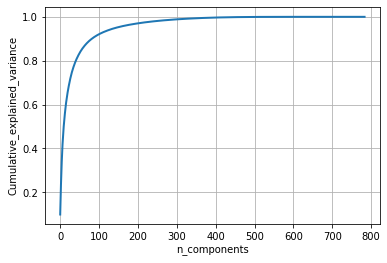

In [6]:
pca = PCA()
pca.n_components = 784
pca_data = pca.fit_transform(trainData)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [7]:
print("MNIST USING KNN WITH INVERSE PCA")
print('-'*30)
pcaobj = PCA(n_components = 100, whiten = True)
pcaTrainData = pcaobj.fit_transform(trainData)
pcaTestData = pcaobj.fit_transform(testData)
invTrainData = pcaobj.inverse_transform(pcaTrainData)
invTestData = pcaobj.inverse_transform(pcaTestData)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(pcaTrainData, trainTargets)
score = model.score(pcaTestData, testTargets)
print("Accuracy: {}".format(score*100))

MNIST USING KNN WITH INVERSE PCA
------------------------------
Accuracy: 13.200000000000001
